### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings("ignore")


In [2]:
# getting path of the file containing dataset

file_path=r"C:\Users\shailesh mhalsekar\Downloads\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (3).xls"
data=pd.read_excel(file_path)# loading dataset
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [3]:
data.drop("EmpNumber",axis=1,inplace=True) # dropping unwanted column

# EDA (Exploratory Data Analysis)

### 1.Department wise performances

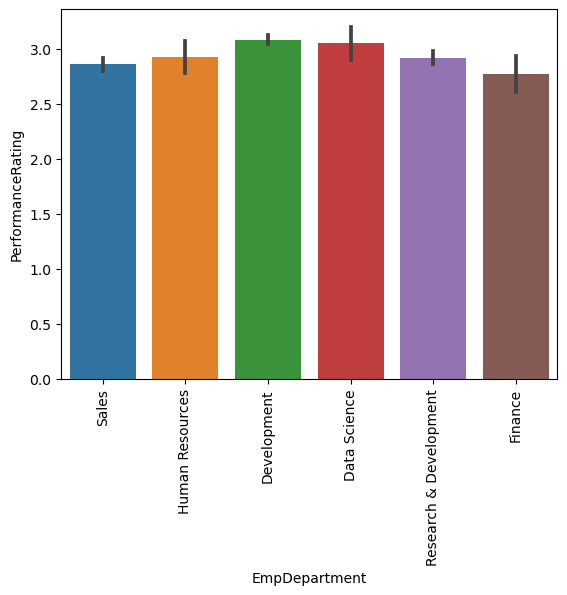

In [4]:
sns.barplot(x=data.EmpDepartment,y=data.PerformanceRating)
plt.xticks(rotation=90)
plt.show()

#### Observation: Employee Department "Development" and "Data Science" has the highest performance rating

# Univariate Analysis

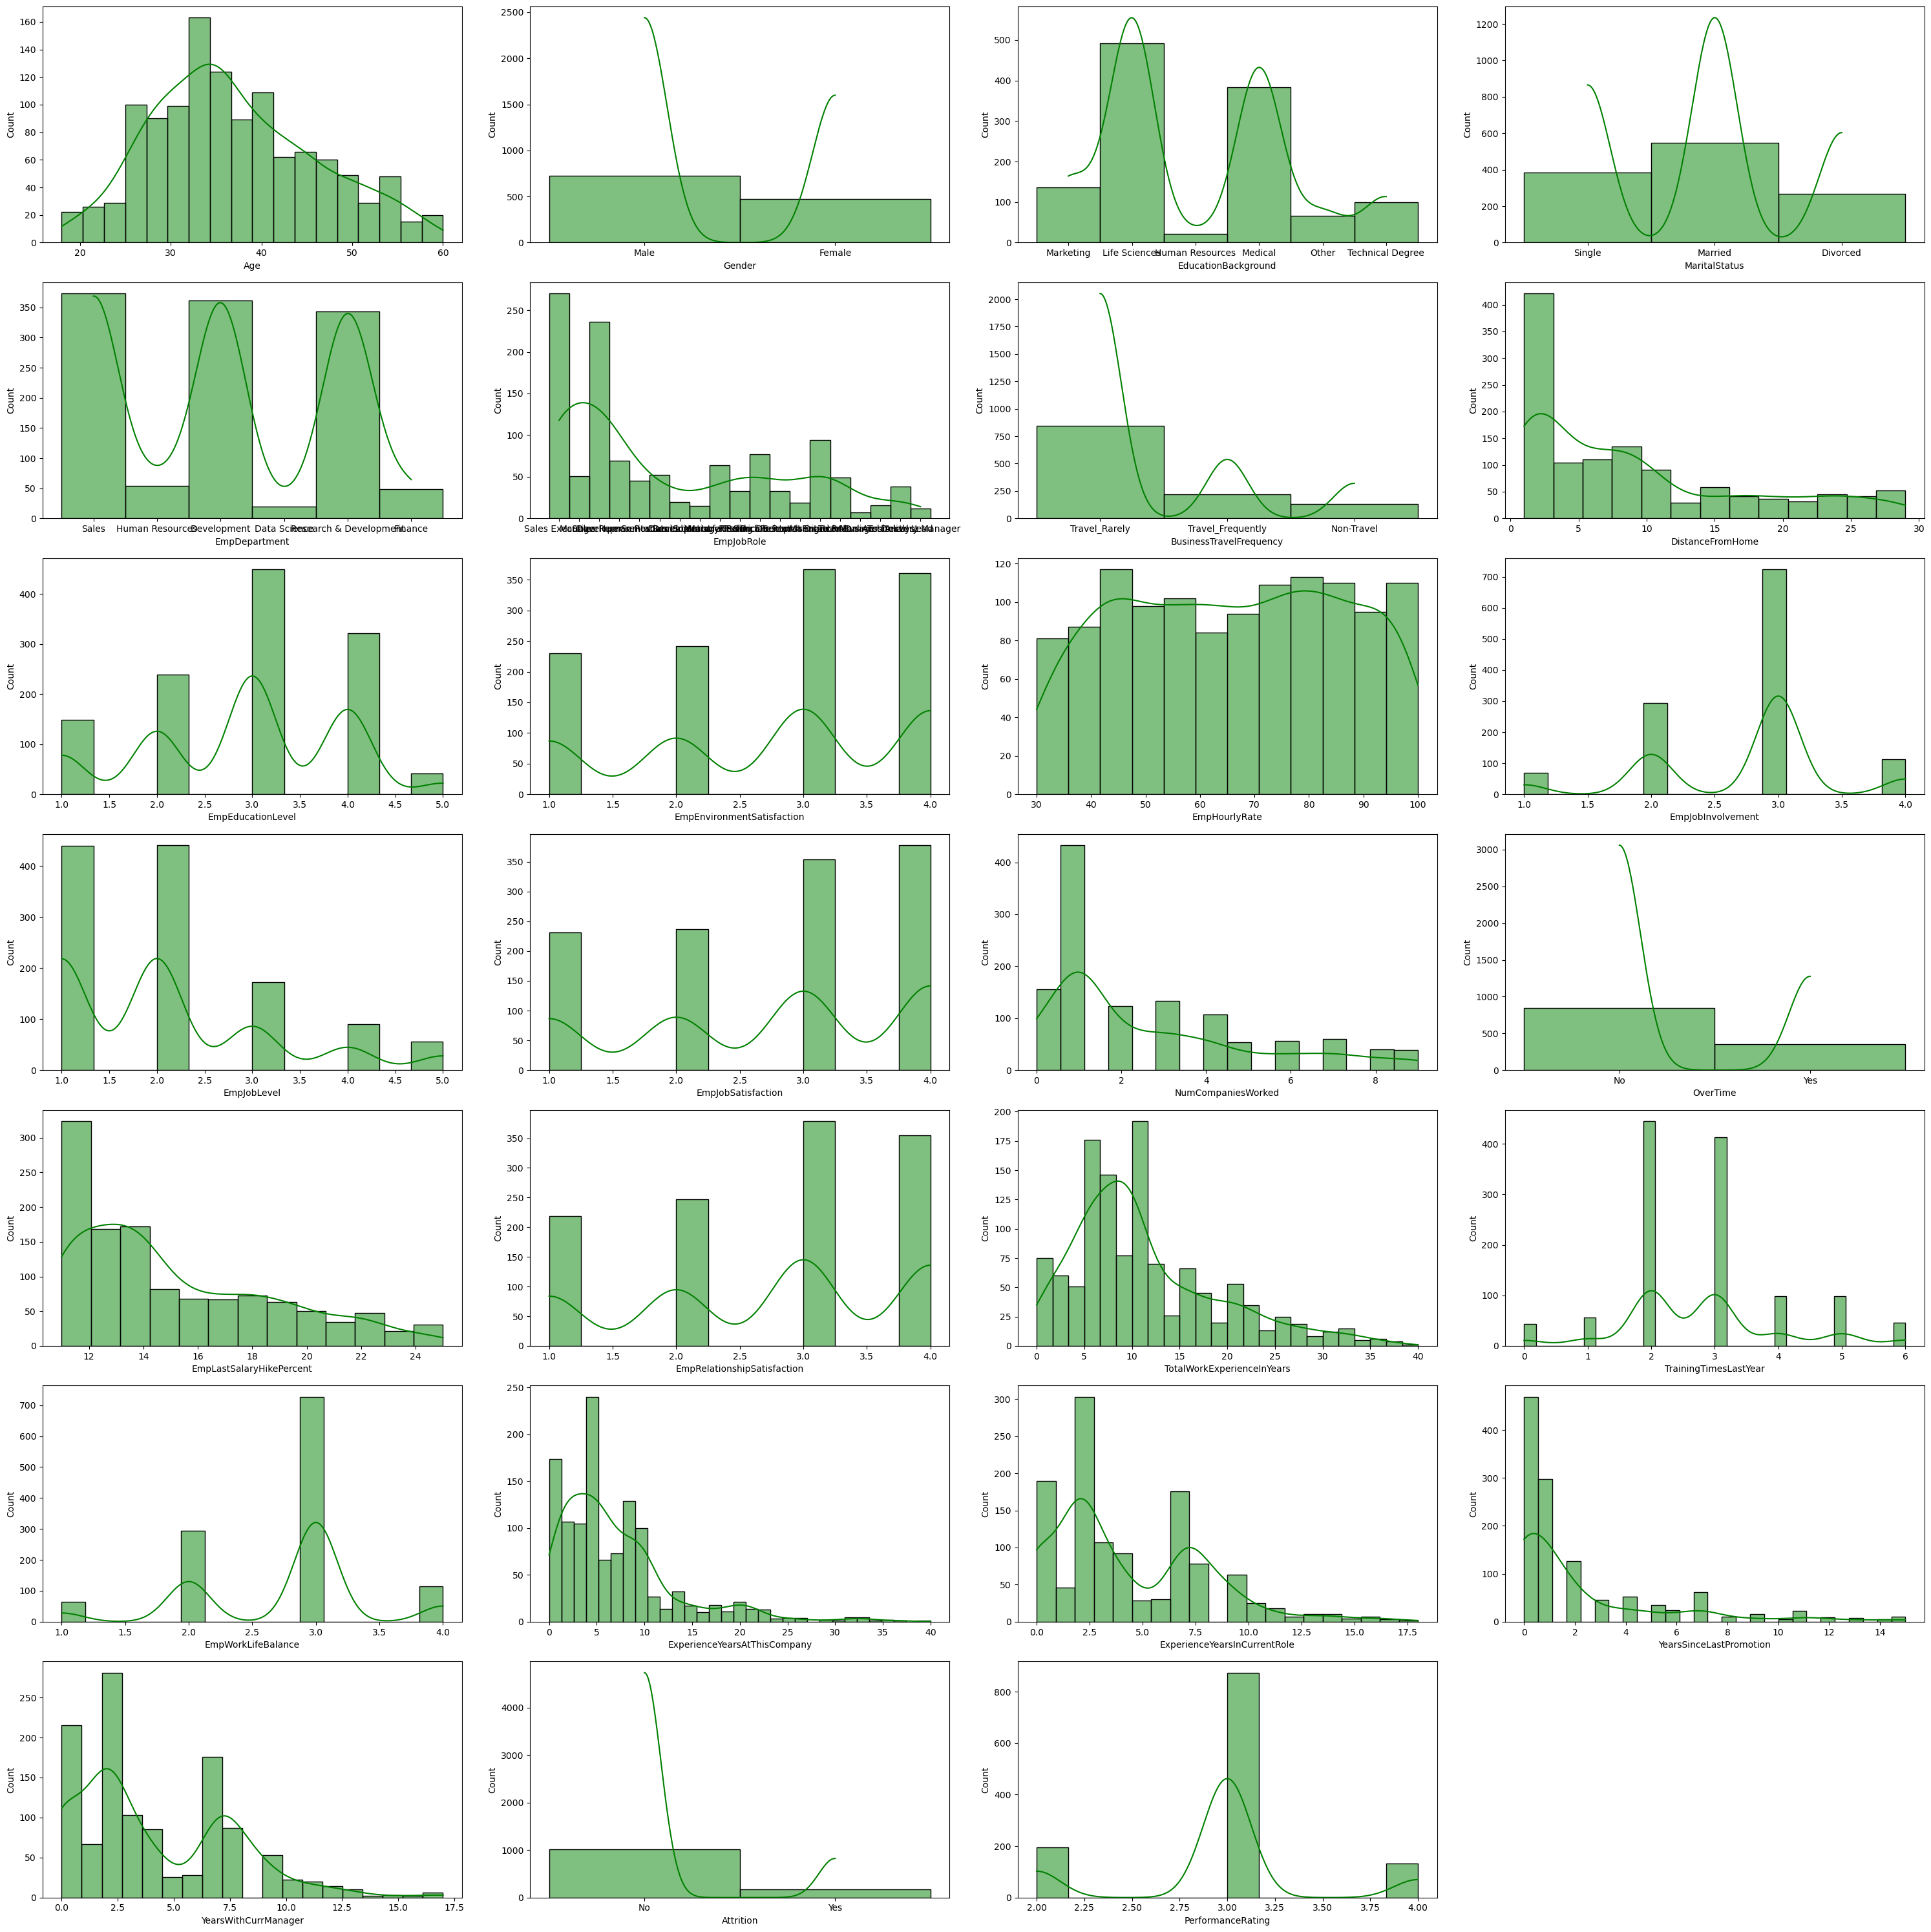

In [5]:
plt.figure(figsize=(30,30))
plotnumber=1 # initializing number of plots
for i in data:
    plt.subplot(7,4,plotnumber) # using subplot
    sns.histplot(x=i,data=data,kde=True,color="green") # plotting histplot
    plotnumber+=1 # increamentation
    plt.subplots_adjust(left=0.1, right=0.9,top=0.9,bottom=0.1)
plt.tight_layout()
plt.show()

# Observations:

1.more number of employees are of 32-34 age.

2.in gender column,value counts of male are greater than female.

3.maximum employees are having educational background of life science and medical.

4.most employees are married.

5.Employee Department "Development" and "Data Science" has the highest performance rating

6.more number of employees has done overtime.

7.total work experience of employee is between 5-15.

8.performance rating 3 has more value counts.

9.in column "Attrition", no has more value counts.

10.employee salary hike decreases gradually.

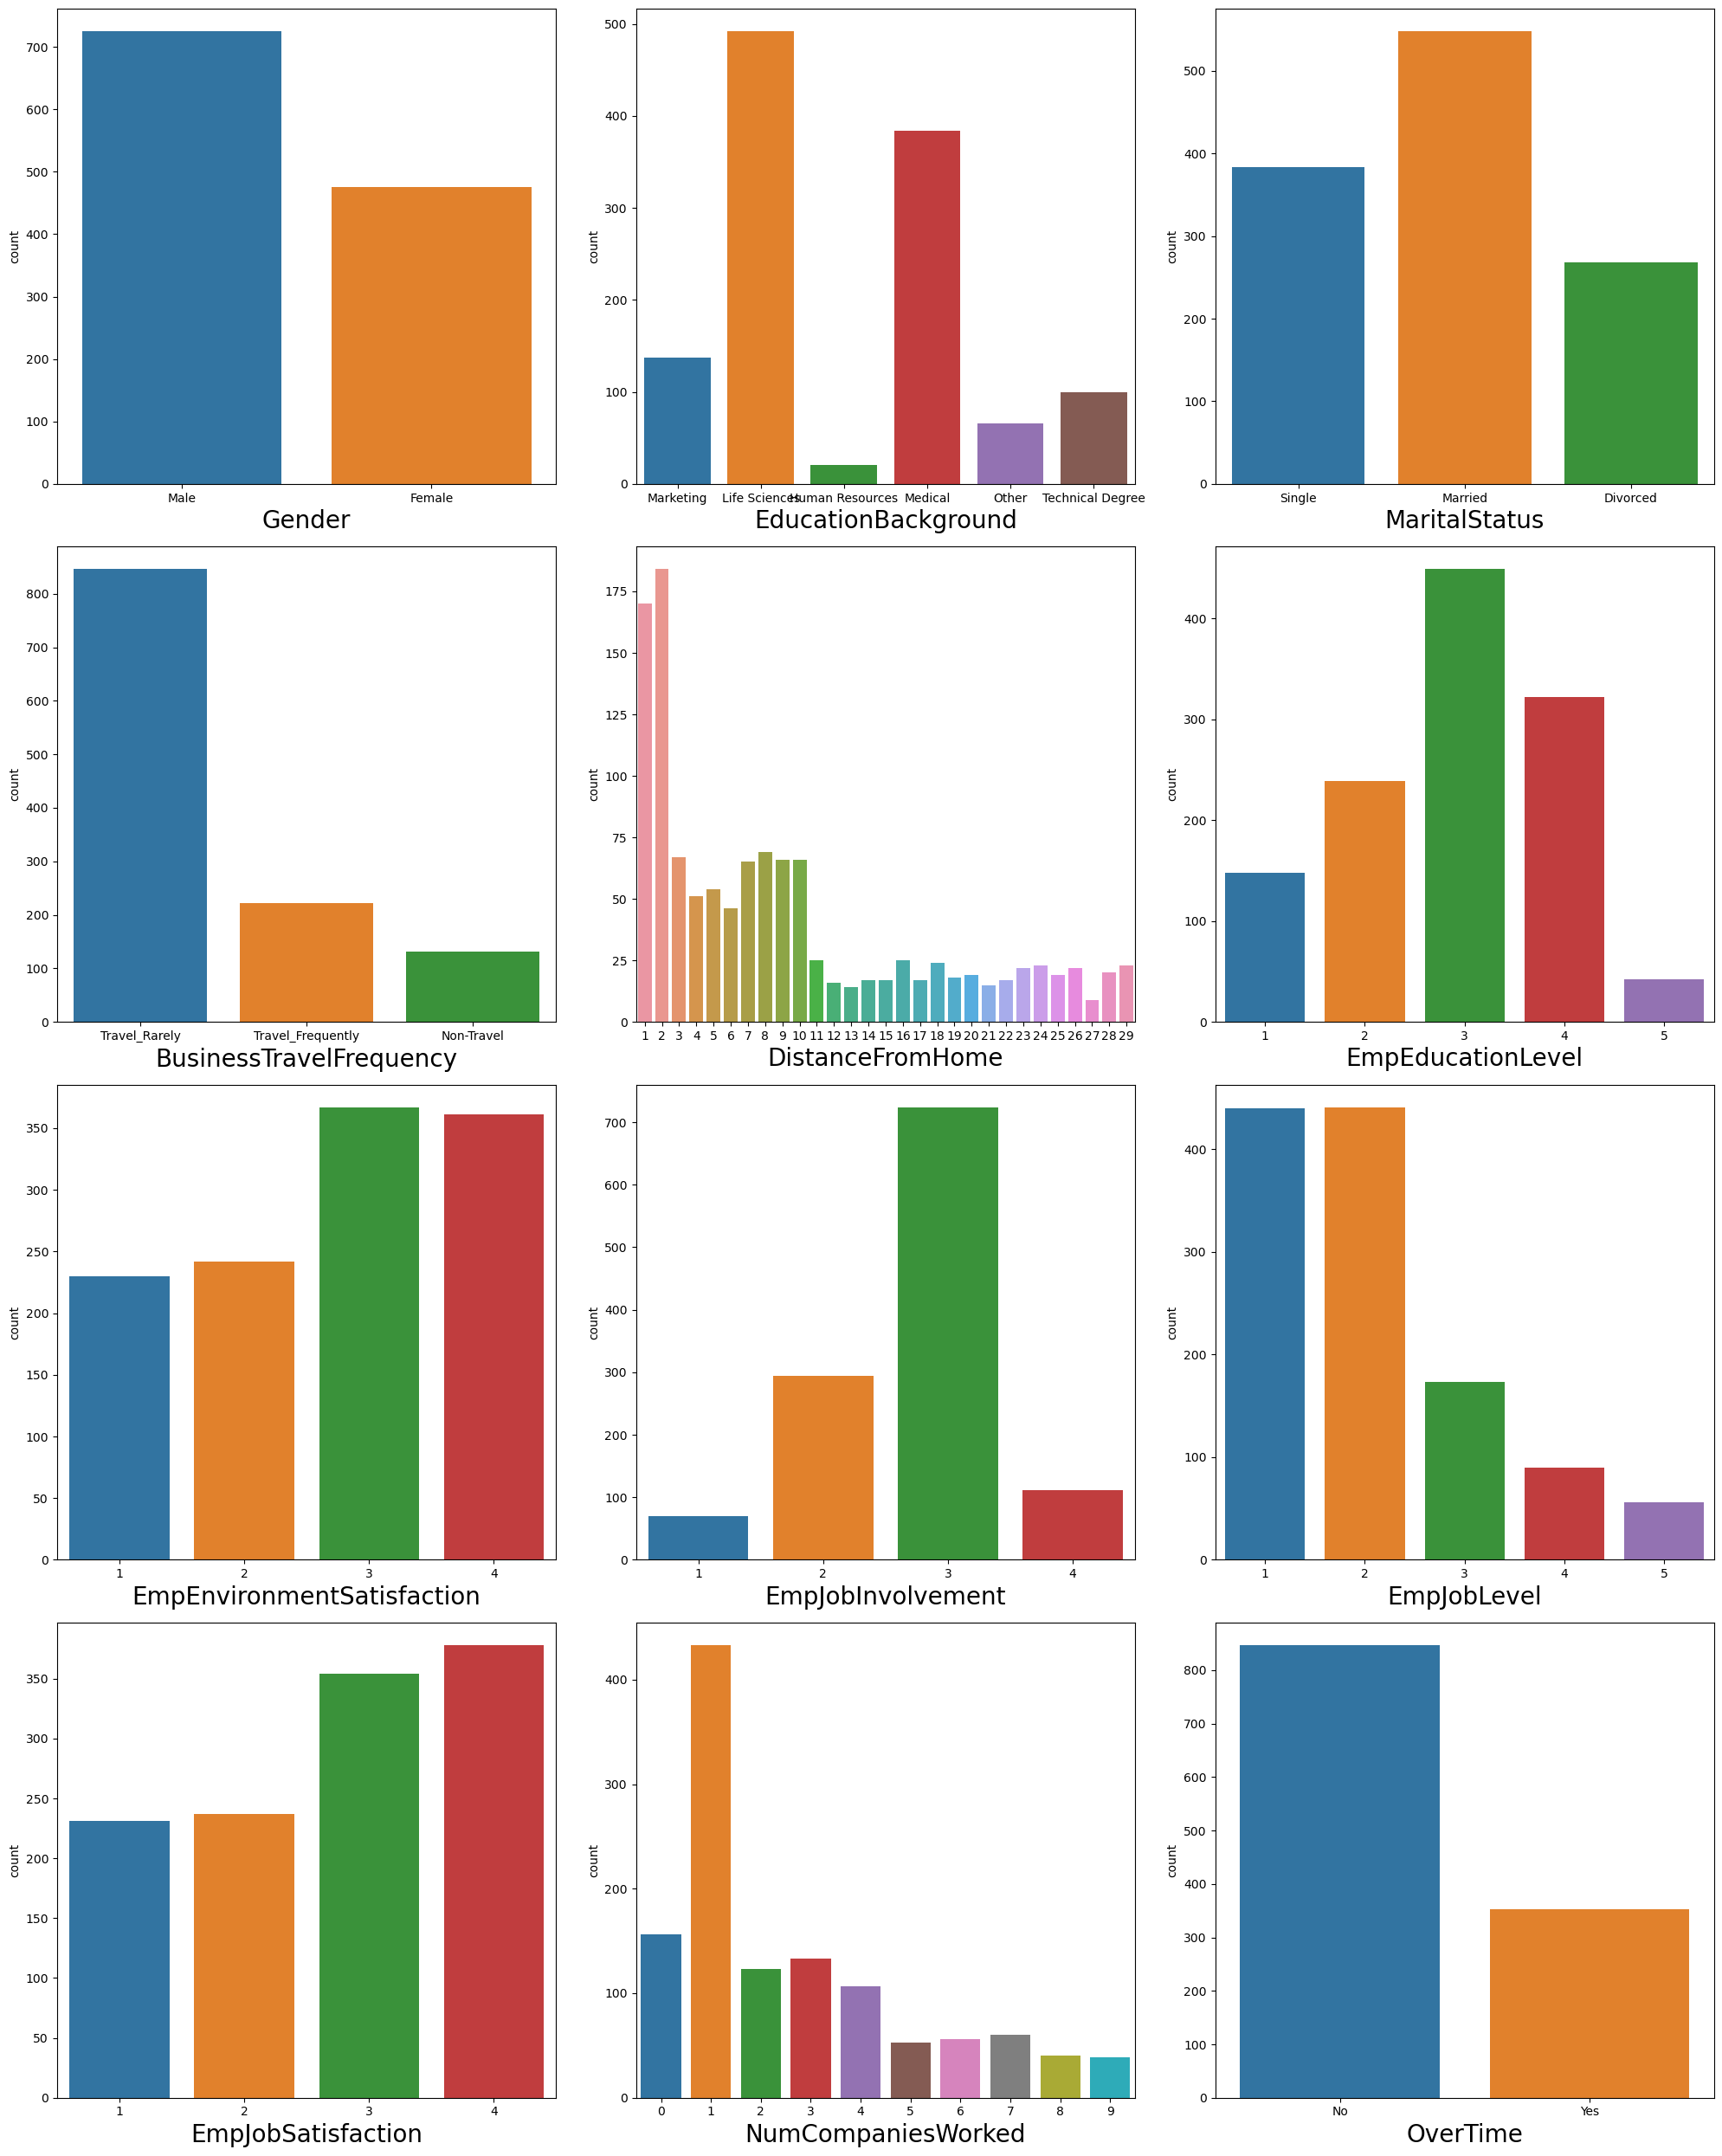

In [6]:
count = data[['Gender', 'EducationBackground', 'MaritalStatus','BusinessTravelFrequency','DistanceFromHome',
              'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel',
              'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime']] # making lsit of next 12 feature

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in count: # iteration of columns / acessing the columns from count 
    if plotno<=13:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=count[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

# Observation:

1.Gender:
Most of the male present in the comapany

2.Education Background:
most of the education background of employee is Life science and medical, as well as marketing eduaction background employee is more than 100.
other eduacation background employee is less than 100.

3.MaritalStatus:
Most of the employee is married as well as less than 400 employee is single.
less than 300 employee mariatal status is divorced.

4.Business Travel Frequency:
    Maximum no of employee travel rarely for company buisness purpose,less than 220 employee travel frequently
remaining less than 120 employee not travell for buisness purpose.

5.Distance From Home:
The range of distance between home to comapny is 1 to 29.
Maximum no of employee home to company distance is less than 10.

6.Educational Level:
Total range of educational level is 1 to 5,Maximum no of employee education level is 3 & 4.
2 education level employee is less than 250 and remianing 1 & 5 education level employee is less than 150.

7.Employee Environment Satisfaction:
Most of the employee Statisfaction is 3 & 4
1 & 2 enviroment satisfaction employee less than 250

8.Employee Job Involvement:
Most of the employee job involvement is 3 as well as 2 job involment employee is less than 300.
Remaining 1 and 4 job involvment employee is less than 100.

9.Employee Job Level:
    The range of employee job kevel is 1 to 5,most of the employee job level is 1 & 2.
Minimum no of job level is 5, as well as 3 & 4 job level employee is less than 180.

10.Employee Job Satisfaction:
Most of the employee job satisfaction is 3 & 4 score as well as 1 & 2 score jon satisfaction employee is less than 250.


# Bivariate Analysis

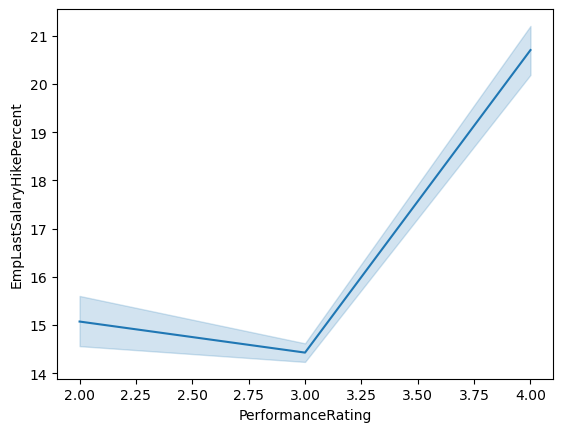

In [7]:
sns.lineplot(x=data.PerformanceRating,y=data.EmpLastSalaryHikePercent)
plt.show()

#### As performance of employee increases salary also increases

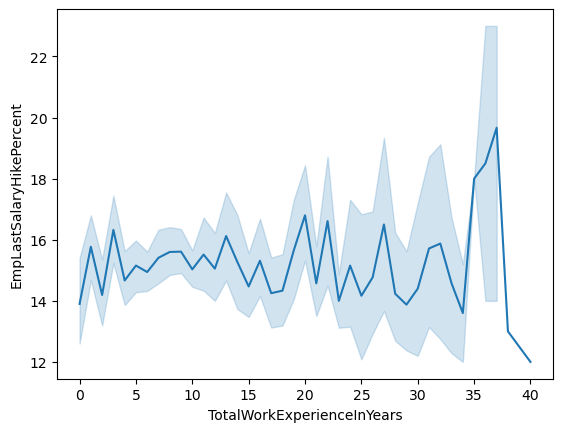

In [8]:
sns.lineplot(x=data.TotalWorkExperienceInYears,y=data.EmpLastSalaryHikePercent)
plt.show()

#### As work experience of employee increases salary also increases

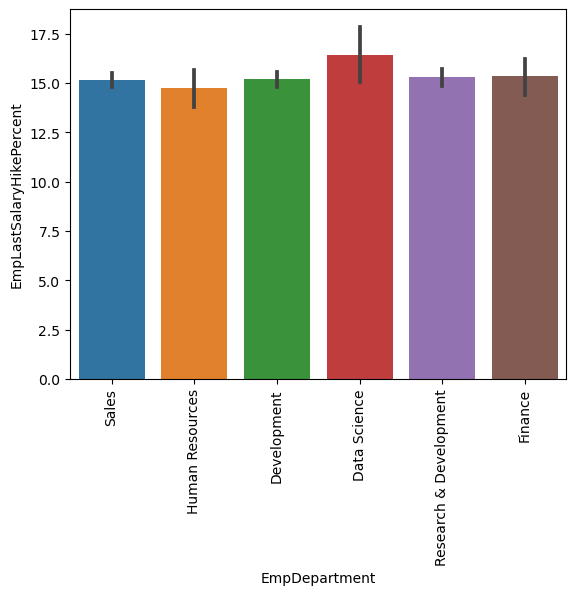

In [9]:
sns.barplot(x=data.EmpDepartment,y=data.EmpLastSalaryHikePercent)
plt.xticks(rotation=90)
plt.show()

#### data science department has more salary hike

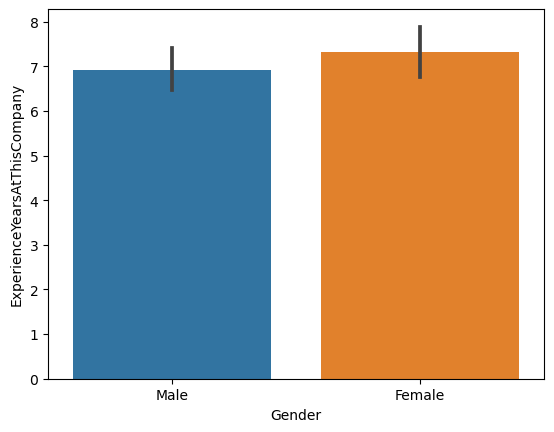

In [10]:
sns.barplot(x=data.Gender,y=data.ExperienceYearsAtThisCompany)
plt.show()

#### most of the females are more experienced than male.

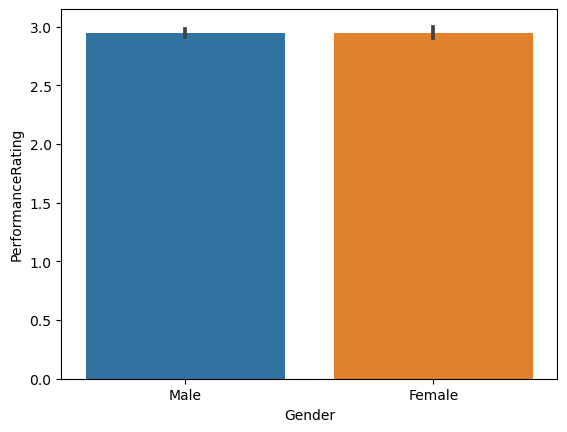

In [11]:
sns.barplot(x=data.Gender,y=data.PerformanceRating)
plt.show()

#### Performance Rating of both the gender are equal.

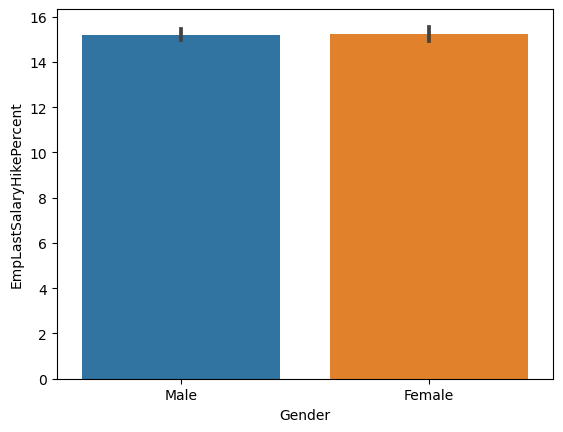

In [12]:
sns.barplot(x=data.Gender,y=data.EmpLastSalaryHikePercent)
plt.show()

#### Salary Hike of both the gender are equal.

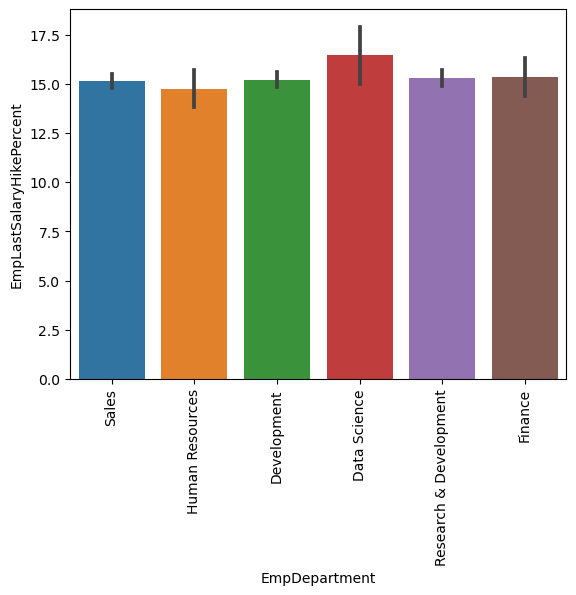

In [13]:
sns.barplot(x=data.EmpDepartment,y=data.EmpLastSalaryHikePercent)
plt.xticks(rotation=90)
plt.show()

#### Data science department has the most salary hike

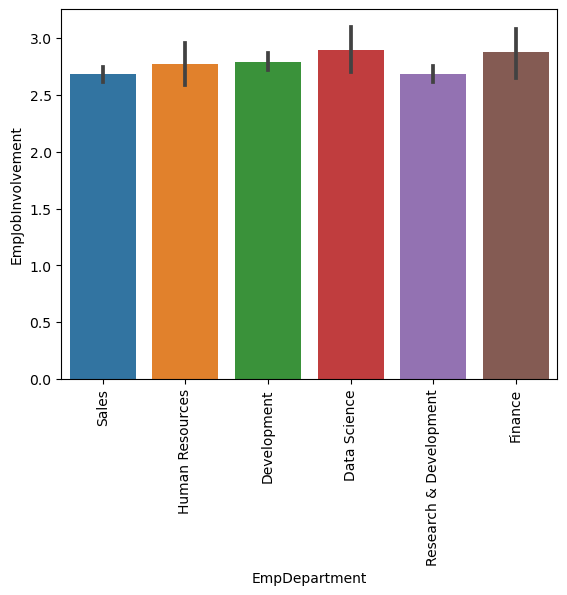

In [14]:
sns.barplot(x=data.EmpDepartment,y=data.EmpJobInvolvement)
plt.xticks(rotation=90)
plt.show()

#### Job involvement of all departments employees are almost same.

# Multivariate Analysis

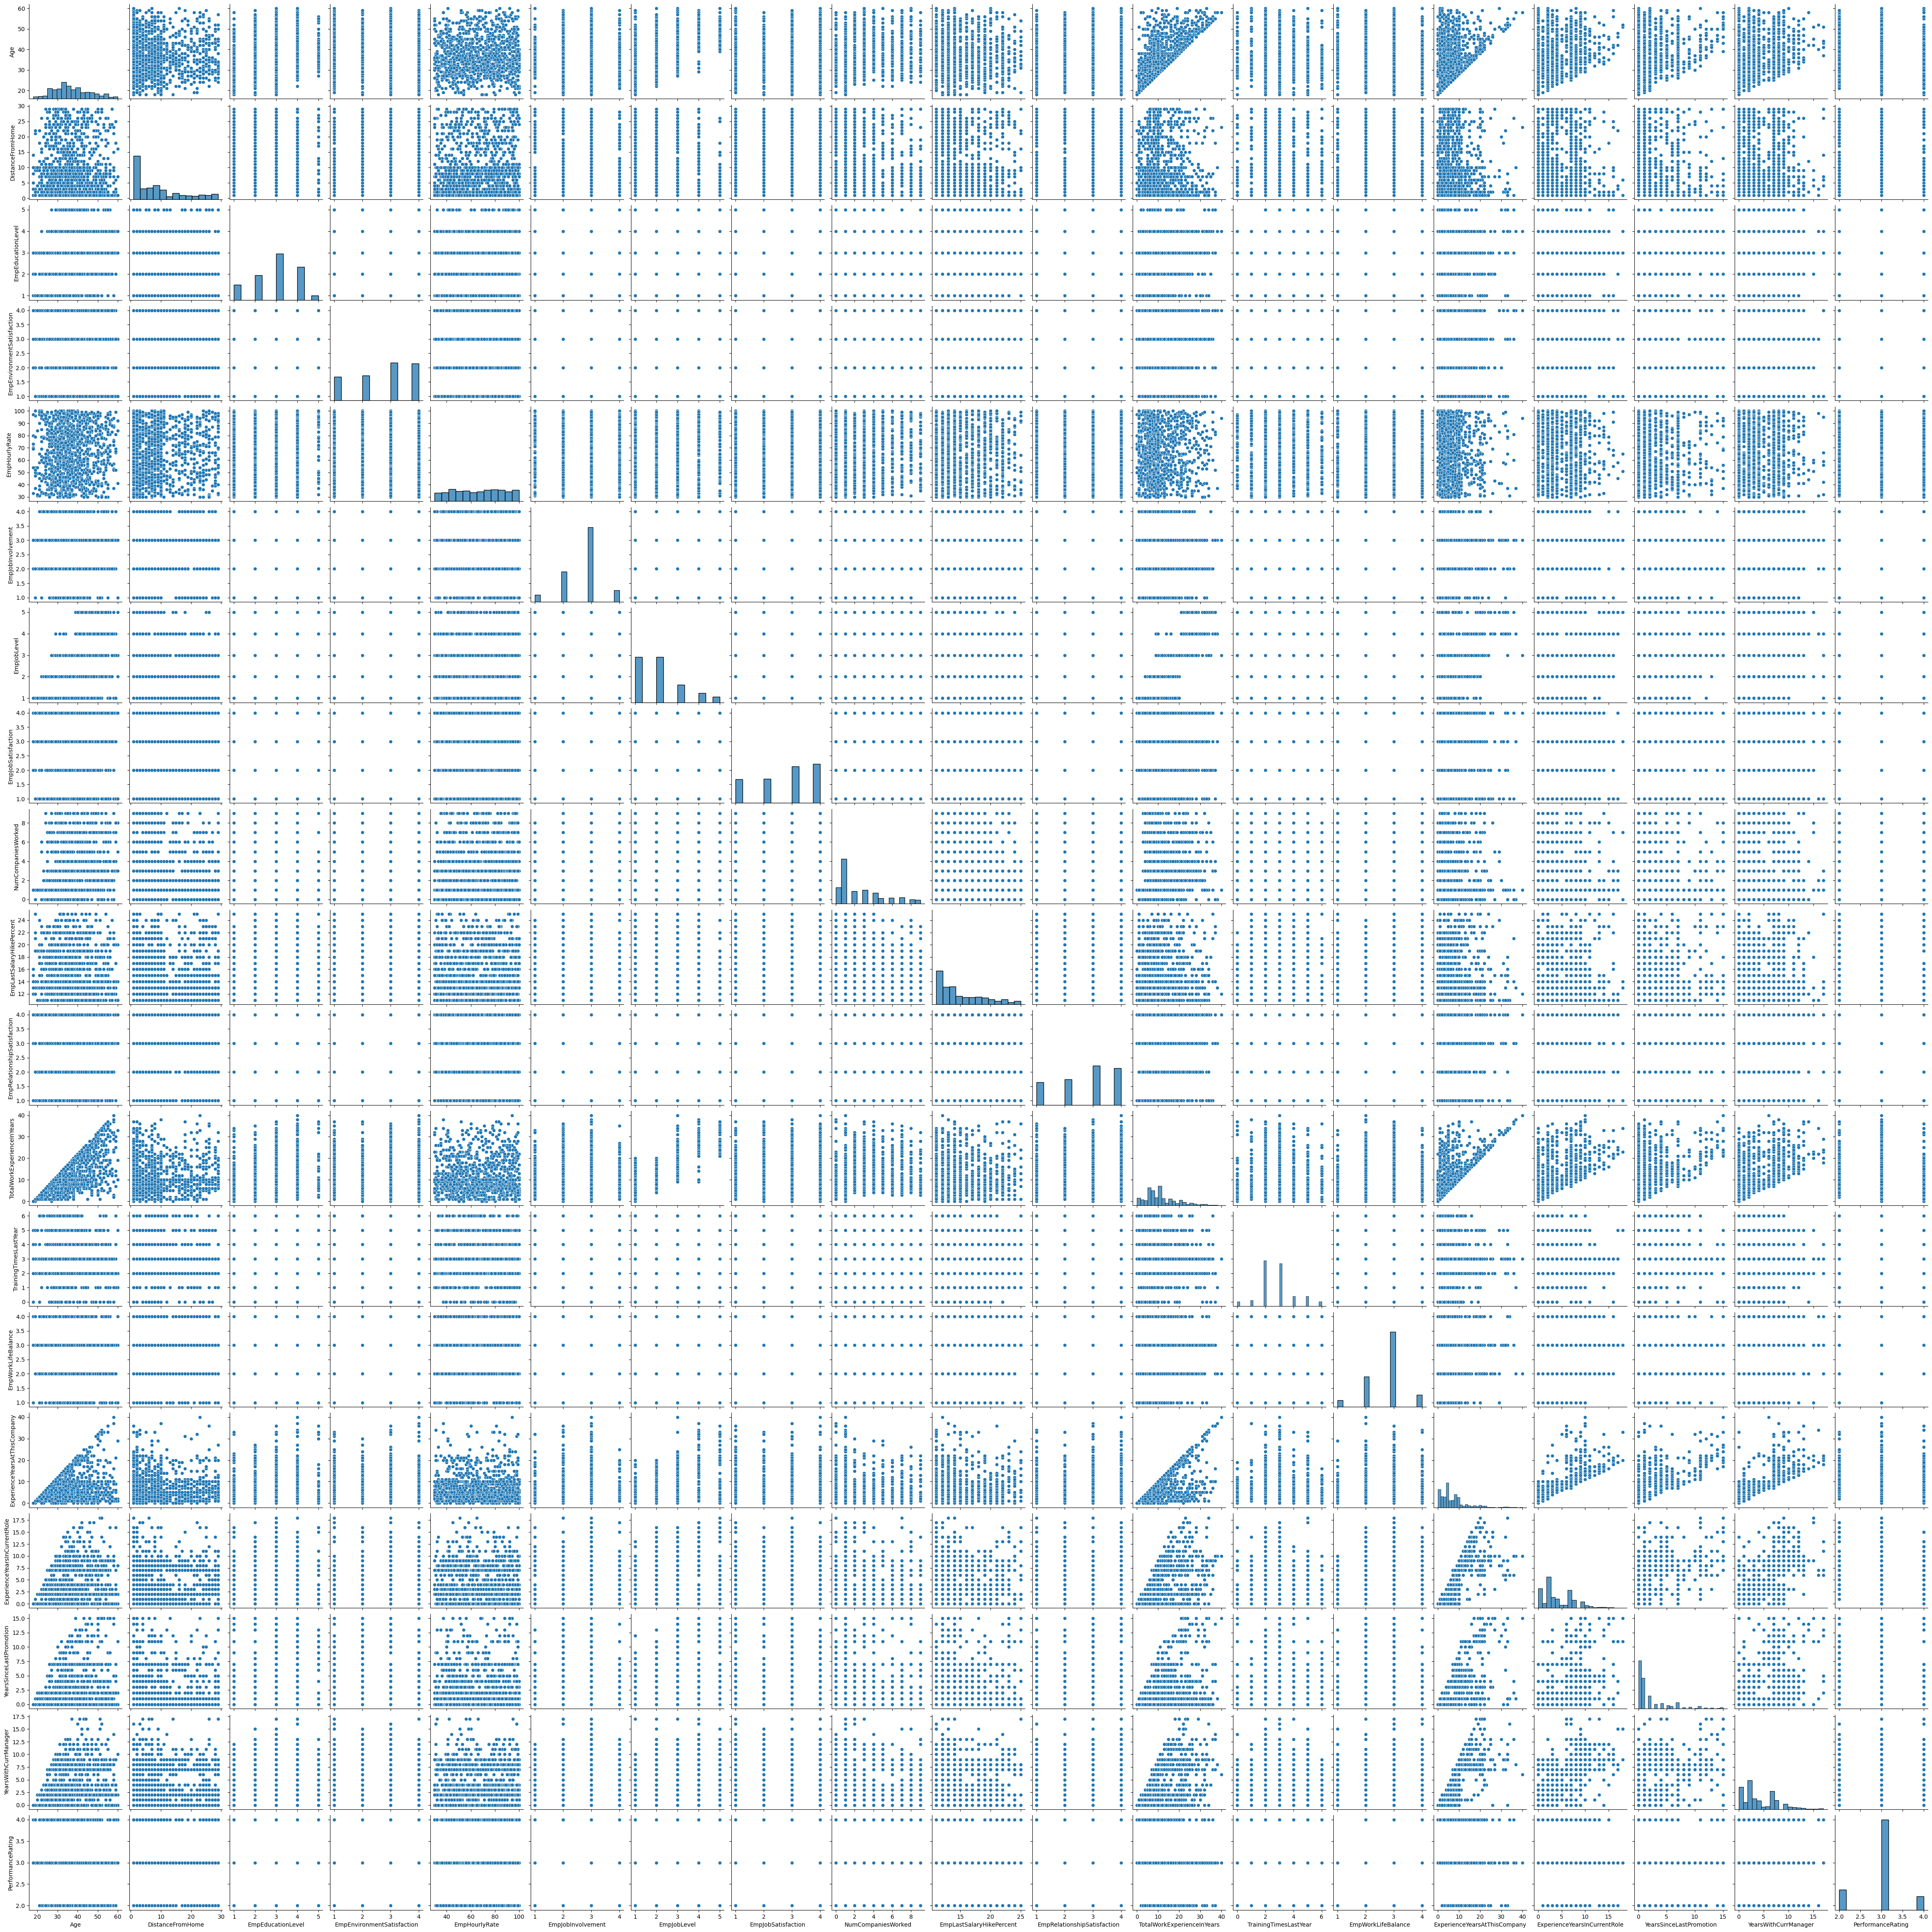

In [15]:
sns.pairplot(data) # using pairplot
plt.show()